In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def image_to_np(path):
    im = Image.open(path)
    im_np = np.asarray(im)
    try:
        im_np = im_np[:, :, 0]
    except IndexError:
        pass
    im_np = np.where(im_np<1, -1, 1)
    im_np = im_np.reshape(N)
    return im_np

In [3]:
# path en donde se encuentran las imagenes
PATH = 'imgs/'
# cantidad de neuronas
N = 50*50
N_sqrt = np.sqrt(N).astype('int32')
#cantidad de imagenes
P = 6

In [4]:
#cargo las imagenes
epsilon = np.asarray([image_to_np(os.path.join(PATH, '50x50_panda.bmp')),
                      image_to_np(os.path.join(PATH, '50x50_v.bmp')),
                      image_to_np(os.path.join(PATH, '50x50_perro.bmp')),
                      image_to_np(os.path.join(PATH, '50x50_paloma.bmp')),
                      image_to_np(os.path.join(PATH, '50x50_quijote.bmp')),
                      image_to_np(os.path.join(PATH, '50x50_torero.bmp'))
                     ])

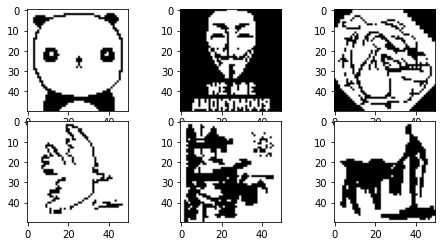

In [5]:
#muestro las imagenes cargadas
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for num, i in enumerate(epsilon):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

In [6]:
epsilon

array([[ 1,  1,  1, ...,  1,  1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]])

100%|██████████| 6/6 [00:01<00:00,  5.78it/s]


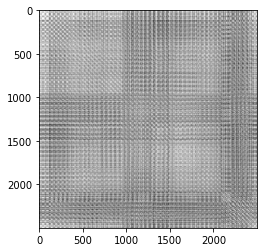

In [7]:
# calculo la matriz w
w = np.zeros((N, N))
for p in tqdm(range(P)):
    w += np.dot(epsilon[p].reshape(-1,1),np.transpose(epsilon[p].reshape(-1,1)))
np.fill_diagonal(w,0)
w /= N
plt.imshow(w, cmap='gray')

100%|██████████| 5/5 [00:00<00:00, 20.41it/s]


array([[ 607., 1470., 1138.,  936., 1339., 1201.],
       [  71., 1612.,  902.,  556., 1209.,  933.],
       [ 129., 1670.,  844.,  498., 1113.,  837.],
       [ 288., 1755.,  821.,  339.,  954.,  786.],
       [ 358., 1781.,  809.,  269., 1024.,  754.],
       [ 358., 1781.,  809.,  269., 1024.,  754.]])

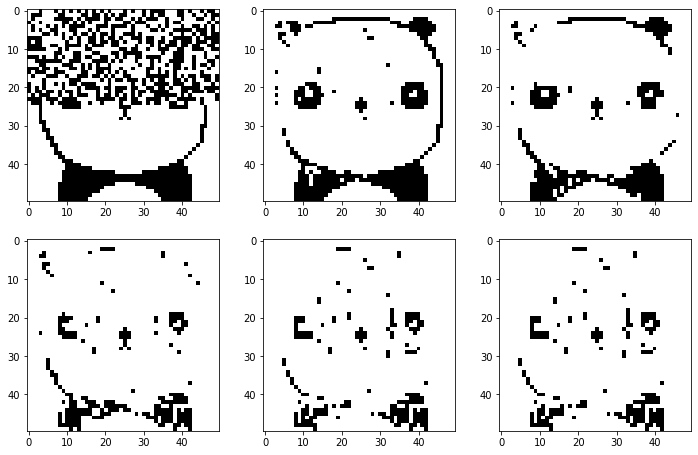

In [83]:
# cantidad de iteraciones
NO_OF_ITERATIONS = 5
# cantidad de bits a cambiar
NO_OF_BITS_TO_CHANGE = 1250

# creo la imagenes modificada
#random_pattern = np.random.randint(P)
random_pattern = 0

test_array = np.copy(epsilon[random_pattern])
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
test_array[0:0+NO_OF_BITS_TO_CHANGE] = random_pattern_test

# calculo la distancia de hamming entre la imagen modificada y todas las imagenes
hamming_distance = np.zeros((NO_OF_ITERATIONS+1, P))
for i in range(P):
    hamming_distance[0, i] = ((epsilon - test_array)[i]!=0).sum()

# grafico la imagen modificada
fig = plt.figure(figsize = (12, 12))
plt.subplot(3, 3, 1)
plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

# reconstruyo la imagen
for iteration in tqdm(range(NO_OF_ITERATIONS)):
    # producto interno entre w y la imagen modificada
    test_array = np.sign(np.dot(test_array,w))
    # calculo la distancia de hamming entre la imagen modificada y todas las imagenes
    for i in range(P):
        hamming_distance[iteration+1, i] = ((epsilon - test_array)[i]!=0).sum()
    plt.subplot(3, 3,iteration+2)
    plt.imshow(test_array.reshape(N_sqrt, N_sqrt), cmap='gray')

hamming_distance

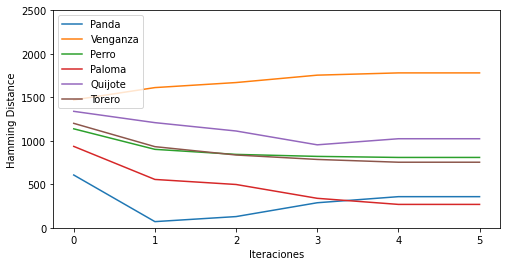

In [84]:
fig = plt.figure(figsize = (8, 4))
plt.plot(hamming_distance)
plt.xlabel('Iteraciones')
plt.ylabel('Hamming Distance')
plt.ylim([0, 2500])
plt.legend(['Panda', 'Venganza', 'Perro', 'Paloma', 'Quijote', 'Torero'],  loc='upper left')
plt.show()